1. Importación de Librerías
Primero, aseguramos que todas las librerías necesarias están importadas correctamente.

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.preprocessing import StandardScaler

2. Creación de DataFrames y Uso de Métodos para Rellenar Valores Nulos
2.1 Rellenar Valores Nulos con ffill y bfill
Descripción:
Este método es adecuado para datos de series temporales o donde hay una lógica clara de continuidad. Es útil cuando los valores faltantes deben ser reemplazados por el valor más cercano en el tiempo (anterior o siguiente).

In [2]:
# Crear un DataFrame con datos de series temporales (precios de acciones)
data = {
    'date': pd.date_range(start='2023-01-01', periods=5, freq='D'),
    'stock_price': [100, np.nan, 102, np.nan, 104]
}
df = pd.DataFrame(data)

# Usar ffill (forward fill) para rellenar valores nulos con el valor anterior
df['stock_price_ffill'] = df['stock_price'].ffill()

# Usar bfill (backward fill) para rellenar valores nulos con el valor siguiente
df['stock_price_bfill'] = df['stock_price'].bfill()

print("DataFrame con forward fill y backward fill:")
print(df)


DataFrame con forward fill y backward fill:
        date  stock_price  stock_price_ffill  stock_price_bfill
0 2023-01-01        100.0              100.0              100.0
1 2023-01-02          NaN              100.0              102.0
2 2023-01-03        102.0              102.0              102.0
3 2023-01-04          NaN              102.0              104.0
4 2023-01-05        104.0              104.0              104.0


3. Imputación de Valores Nulos con KNNImputer
Descripción:
Este método es adecuado para datos multidimensionales donde se desea considerar la similitud entre muestras. Es útil cuando se desea usar la similitud entre características para imputar los valores faltantes.

In [3]:
# DataFrame con datos multidimensionales (características de clientes)
data2 = {
    'customer_id': [1, 2, 3, 4, 5],
    'customer_age': [22, 21, 25, 23, 24],
    'customer_income': [59000, 9600, 9600, 65500, 54400],
    'historical_default': ['Y', None, 'N', 'N', 'Y'],
    'cred_hist_length': [3, 2, 3, 2, 4],
    'Current_loan_status': ['DEFAULT', 'NO DEFAULT', 'DEFAULT', 'DEFAULT', 'DEFAULT']
}

df2 = pd.DataFrame(data2)

# Convertir 'Y' y 'N' a 1 y 0
def convert_bin(value):
    if value == 'Y':
        return 1
    elif value == 'N':
        return 0
    return value

df2['historical_default'] = df2['historical_default'].apply(convert_bin)

# Crear una instancia del KNNImputer
imputer = KNNImputer(n_neighbors=2)

# Imputar los valores nulos
df2[['historical_default']] = imputer.fit_transform(df2[['historical_default']])

# Asegurarse de que los valores imputados son enteros (0 o 1)
df2['historical_default'] = df2['historical_default'].round().astype(int)

print("DataFrame con KNNImputer:")
print(df2)


DataFrame con KNNImputer:
   customer_id  customer_age  customer_income  historical_default  \
0            1            22            59000                   1   
1            2            21             9600                   0   
2            3            25             9600                   0   
3            4            23            65500                   0   
4            5            24            54400                   1   

   cred_hist_length Current_loan_status  
0                 3             DEFAULT  
1                 2          NO DEFAULT  
2                 3             DEFAULT  
3                 2             DEFAULT  
4                 4             DEFAULT  


4. Reasignar IDs Secuenciales a la Columna customer_id
Descripción:
Este paso es útil cuando hay valores nulos en la columna customer_id y deseas reasignar IDs secuenciales.

In [4]:
data3 = {
    'customer_id': [1, 2, 3, None, 5],
    'customer_age': [22, 21, 25, 23, 24],
    'customer_income': [59000, 9600, 9600, 65500, 54400]
}
df3 = pd.DataFrame(data3)

print("Antes de reasignar IDs:")
print(df3)

# Asignar nuevos IDs secuenciales a la columna customer_id
df3['customer_id'] = range(1, len(df3) + 1)

print("Después de reasignar IDs:")
print(df3)


Antes de reasignar IDs:
   customer_id  customer_age  customer_income
0          1.0            22            59000
1          2.0            21             9600
2          3.0            25             9600
3          NaN            23            65500
4          5.0            24            54400
Después de reasignar IDs:
   customer_id  customer_age  customer_income
0            1            22            59000
1            2            21             9600
2            3            25             9600
3            4            23            65500
4            5            24            54400


5. Interpolación de Valores Nulos
Descripción:
La interpolación es adecuada para datos continuos. Funciona mejor cuando hay una tendencia o patrón claro en los datos. No es recomendable para datos binarios.

In [5]:
# Datos con valores atípicos y algunos valores nulos
data_with_outliers = [1, 2, 3, None, 5, 6, None, 3333, 833333, 9999, None, 10, 123131]

# Crear un DataFrame con estos datos
df_outliers = pd.DataFrame(data_with_outliers, columns=['values'])

# Interpolar los valores nulos
df_outliers['values_interpolated'] = df_outliers['values'].interpolate()

print("DataFrame con interpolación:")
print(df_outliers)


DataFrame con interpolación:
      values  values_interpolated
0        1.0                  1.0
1        2.0                  2.0
2        3.0                  3.0
3        NaN                  4.0
4        5.0                  5.0
5        6.0                  6.0
6        NaN               1669.5
7     3333.0               3333.0
8   833333.0             833333.0
9     9999.0               9999.0
10       NaN               5004.5
11      10.0                 10.0
12  123131.0             123131.0


6. Conversión de Columnas a Tipo Float
Descripción:
Es útil para asegurarse de que las columnas especificadas están en el tipo de datos correcto.

In [6]:
# DataFrame de ejemplo
merged_1_2 = pd.DataFrame({
    'resul1': [1, 2, np.nan, 4],
    'result2': [5, 6, 7, 8],
    'penal_1': [9, 10, 11, 12],
    'penal_2': [13, 14, 15, 16]
})

# Convertir las columnas especificadas a float
columns_to_convert = ['resul1', 'result2', 'penal_1', 'penal_2']
for column in columns_to_convert:
    merged_1_2[column] = merged_1_2[column].astype(float)

print("DataFrame con columnas convertidas a float:")
print(merged_1_2)


DataFrame con columnas convertidas a float:
   resul1  result2  penal_1  penal_2
0     1.0      5.0      9.0     13.0
1     2.0      6.0     10.0     14.0
2     NaN      7.0     11.0     15.0
3     4.0      8.0     12.0     16.0


8. Codificación de Variables Categóricas con OneHotEncoder
Descripción:
La codificación OneHotEncoder es útil para convertir variables categóricas en variables binarias.

In [7]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# DataFrame de ejemplo
data4 = {
    'Migration_route': ['US-Mexico border crossing', 'Sahara Desert crossing', 'Central Mediterranean', 'Western Mediterranean', 'Afghanistan to Iran']
}
df4 = pd.DataFrame(data4)

# Seleccionar la columna que se va a codificar
categoria_column = df4[['Migration_route']]

# Encoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(categoria_column)

# Convertir en DataFrame
encoded_columns = encoder.get_feature_names_out(['Migration_route'])
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# Concatenar los datos codificados con el DataFrame original
df4 = pd.concat([df4.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

print(df4.head())


# Seleccionar la columna que se va a codificar
# categoria_column = ['HomePlanet','CryoSleep','Cabin','Destination','VIP']

# Encoder
# encoder = OneHotEncoder(sparse_output=False, drop='first')
# encoded_data = encoder.fit_transform(x2[categoria_column])

# Convertir en DataFrame
# encoded_columns = encoder.get_feature_names_out(categoria_column)
# encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# Concatenar los datos codificados con el DataFrame original
# x2 = pd.concat([x2.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# print(x2.head())

             Migration_route  Migration_route_Central Mediterranean  \
0  US-Mexico border crossing                                    0.0   
1     Sahara Desert crossing                                    0.0   
2      Central Mediterranean                                    1.0   
3      Western Mediterranean                                    0.0   
4        Afghanistan to Iran                                    0.0   

   Migration_route_Sahara Desert crossing  \
0                                     0.0   
1                                     1.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   Migration_route_US-Mexico border crossing  \
0                                        1.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   Migration_

9. Reemplazar Categorías con Valores Numéricos
Descripción:
Este método es útil para convertir categorías en valores numéricos utilizando un diccionario

In [8]:
import pandas as pd

# DataFrame de ejemplo
data5 = {
    'Information_Source': ['Source A', 'Source B', 'Source C', 'Source A', 'Source B']
}
df5 = pd.DataFrame(data5)

# Crear un diccionario que mapea cada categoría en 'Information_Source' a un número único
source_quality_dicc = {category: idx for idx, category in enumerate(df5['Information_Source'].unique(), 1)}

# Reemplazar las categorías con valores numéricos
df5['Information_Source'] = df5['Information_Source'].replace(source_quality_dicc)

print("DataFrame con categorías reemplazadas por valores numéricos:")
print(df5)


DataFrame con categorías reemplazadas por valores numéricos:
   Information_Source
0                   1
1                   2
2                   3
3                   1
4                   2


C:\Users\FRANK\AppData\Local\Temp\ipykernel_17716\1363229805.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df5['Information_Source'] = df5['Information_Source'].replace(source_quality_dicc)


10. Correlación de Pearson
Descripción:
En estadística, la correlación mide la fuerza y la dirección de una relación lineal entre dos variables. Aquí hay algunas pautas generales para interpretar el coeficiente de correlación de Pearson (𝑟):

In [9]:
# 𝑟 = 1: Correlación perfecta positiva. A medida que una variable aumenta, la otra también aumenta de manera proporcional.
# 𝑟 = -1: Correlación perfecta negativa. A medida que una variable aumenta, la otra disminuye de manera proporcional.
# 𝑟 = 0: No hay correlación. No hay una relación lineal entre las dos variables.
# 0 < |𝑟| < 0.3: Correlación débil. La relación entre las variables es débil.
# 0.3 ≤ |𝑟| < 0.5: Correlación moderada. Hay una relación lineal moderada entre las variables.
# 0.5 ≤ |𝑟| < 0.7: Correlación alta. Las variables tienen una relación lineal fuerte.
# 0.7 ≤ |𝑟| ≤ 1.0: Correlación muy alta. Las variables tienen una relación lineal muy fuerte.

# Interpretación de los Valores Negativos
# Un valor negativo de 𝑟 indica que existe una relación inversa entre las dos variables. Esto significa que cuando una variable aumenta, la otra tiende a disminuir. Aquí hay algunos ejemplos para aclarar esta interpretación:

# 𝑟 = -1: Una correlación perfecta negativa. Por ejemplo, si aumentas la velocidad de un coche, el tiempo para llegar a un destino disminuye de manera proporcional.
# 𝑟 = -0.5: Una correlación negativa alta. Si aumentas el precio de un producto, la cantidad vendida puede disminuir de manera considerable.
# 𝑟 = -0.1: Una correlación negativa débil. Puede haber una pequeña tendencia de que al aumentar el uso de redes sociales, el tiempo dedicado a estudiar disminuye ligeramente.

# Cargar el dataset del Titanic de seaborn
titanic = sns.load_dataset('titanic')

# Crear nuevas columnas relevantes
titanic['Number_of_Survivors'] = titanic['survived']
titanic['Number_of_Females'] = titanic['sex'].apply(lambda x: 1 if x == 'female' else 0)
titanic['Number_of_Males'] = titanic['sex'].apply(lambda x: 1 if x == 'male' else 0)

# Seleccionar las columnas para calcular la correlación
columns_of_interest = ['Number_of_Survivors', 'Number_of_Females', 'Number_of_Males', 'age', 'fare']
df = titanic[columns_of_interest]

# Calcular la matriz de correlación
correlation_matrix = df.corr()

print(correlation_matrix)

                     Number_of_Survivors  Number_of_Females  Number_of_Males  \
Number_of_Survivors             1.000000           0.543351        -0.543351   
Number_of_Females               0.543351           1.000000        -1.000000   
Number_of_Males                -0.543351          -1.000000         1.000000   
age                            -0.077221          -0.093254         0.093254   
fare                            0.257307           0.182333        -0.182333   

                          age      fare  
Number_of_Survivors -0.077221  0.257307  
Number_of_Females   -0.093254  0.182333  
Number_of_Males      0.093254 -0.182333  
age                  1.000000  0.096067  
fare                 0.096067  1.000000  


* Interpretación de los Resultados

* Number_of_Survivors y Number_of_Females (0.203874): Hay una correlación débil positiva entre el número de sobrevivientes y el número de mujeres. Esto indica que las mujeres tenían # una ligera tendencia a sobrevivir más que los hombres.

* Number_of_Survivors y Number_of_Males (-0.203874): Hay una correlación débil negativa entre el número de sobrevivientes y el número de hombres. Esto sugiere que los hombres tenían una ligera tendencia a sobrevivir menos que las mujeres.

* Number_of_Females y Number_of_Males (-1.000000): Hay una correlación perfecta negativa entre el número de mujeres y el número de hombres, lo cual es esperado porque son variables mutuamente excluyentes.

In [10]:
# Crear un DataFrame de ejemplo
data = {
    'Age': [25, np.nan, 30, 22, np.nan, 35],
    'RoomService': [100, 200, np.nan, 400, 500, np.nan],
    'FoodCourt': [50, np.nan, 150, 200, np.nan, 300],
    'ShoppingMall': [20, 30, 40, np.nan, 60, 70],
    'Spa': [0, 100, 200, 300, np.nan, 500],
    'VRDeck': [10, 20, np.nan, 40, 50, np.nan]
}

x2 = pd.DataFrame(data)
print("DataFrame original con valores nulos:")
print(x2)

# Definir las columnas a imputar
columna_impute = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Imputar valores faltantes usando KNNImputer
imputer = KNNImputer(n_neighbors=2)
x2[columna_impute] = imputer.fit_transform(x2[columna_impute])

print("\nDataFrame después de imputar valores nulos con KNNImputer:")
print(x2)

# Escalar las características usando StandardScaler
scaler = StandardScaler()
x2[columna_impute] = scaler.fit_transform(x2[columna_impute])

print("\nDataFrame después de escalar las características con StandardScaler:")
print(x2)


DataFrame original con valores nulos:
    Age  RoomService  FoodCourt  ShoppingMall    Spa  VRDeck
0  25.0        100.0       50.0          20.0    0.0    10.0
1   NaN        200.0        NaN          30.0  100.0    20.0
2  30.0          NaN      150.0          40.0  200.0     NaN
3  22.0        400.0      200.0           NaN  300.0    40.0
4   NaN        500.0        NaN          60.0    NaN    50.0
5  35.0          NaN      300.0          70.0  500.0     NaN

DataFrame después de imputar valores nulos con KNNImputer:
    Age  RoomService  FoodCourt  ShoppingMall    Spa  VRDeck
0  25.0        100.0       50.0          20.0    0.0    10.0
1  27.5        200.0      100.0          30.0  100.0    20.0
2  30.0        450.0      150.0          40.0  200.0    45.0
3  22.0        400.0      200.0          50.0  300.0    40.0
4  32.5        500.0      225.0          60.0  350.0    50.0
5  35.0        450.0      300.0          70.0  500.0    45.0

DataFrame después de escalar las característica

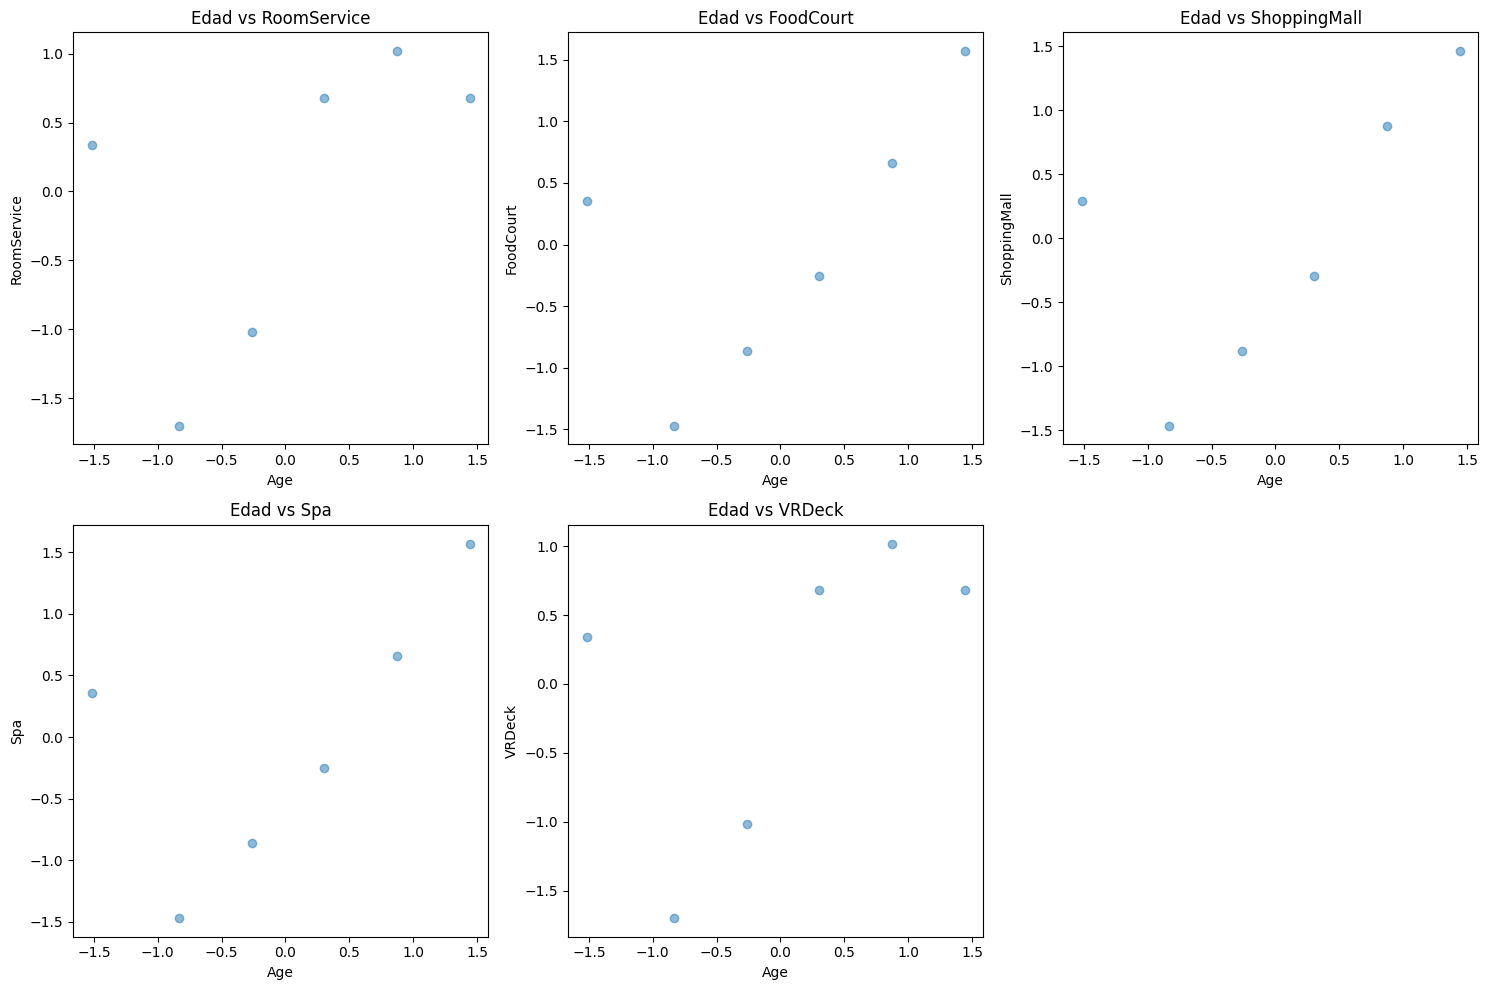

In [11]:
import matplotlib.pyplot as plt

# Configurar el tamaño de los gráficos
plt.figure(figsize=(15, 10))

# Edad vs RoomService
plt.subplot(2, 3, 1)
plt.scatter(x2['Age'], x2['RoomService'], alpha=0.5)
plt.title('Edad vs RoomService')
plt.xlabel('Age')
plt.ylabel('RoomService')

# Edad vs FoodCourt
plt.subplot(2, 3, 2)
plt.scatter(x2['Age'],x2['FoodCourt'], alpha=0.5)
plt.title('Edad vs FoodCourt')
plt.xlabel('Age')
plt.ylabel('FoodCourt')

# Edad vs ShoppingMall
plt.subplot(2, 3, 3)
plt.scatter(x2['Age'], x2['ShoppingMall'], alpha=0.5)
plt.title('Edad vs ShoppingMall')
plt.xlabel('Age')
plt.ylabel('ShoppingMall')

# Edad vs Spa
plt.subplot(2, 3, 4)
plt.scatter(x2['Age'], x2['Spa'], alpha=0.5)
plt.title('Edad vs Spa')
plt.xlabel('Age')
plt.ylabel('Spa')

# Edad vs VRDeck
plt.subplot(2, 3, 5)
plt.scatter(x2['Age'], x2['VRDeck'], alpha=0.5)
plt.title('Edad vs VRDeck')
plt.xlabel('Age')
plt.ylabel('VRDeck')

plt.tight_layout()
plt.show()


In [12]:
# Crear archivo csv

# archivo = open('parte2_final.csv',"w")
# print('el archivo se ha creado')
# archivo.close()

# Detective Frank para hallar valores Nulos

In [13]:
# Detective Frank para hallar valores Nulos

data = {
    'binary_feature': [1, 0, np.nan, 1, 0],
    'numeric_feature1': [10, 3, 6, 1, 7],
    'numeric_feature2': [np.nan, 3, 2, np.nan, 4],
    'categorical_feature': ['manzana', 'pera', 'naranja', np.nan, 'piña'],
    'target': [1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)
print("Dataset original con valores nulos:")
print(df)


Dataset original con valores nulos:
   binary_feature  numeric_feature1  numeric_feature2 categorical_feature  \
0             1.0                10               NaN             manzana   
1             0.0                 3               3.0                pera   
2             NaN                 6               2.0             naranja   
3             1.0                 1               NaN                 NaN   
4             0.0                 7               4.0                piña   

   target  
0       1  
1       0  
2       1  
3       0  
4       1  


In [14]:
# Imputar valores nulos en características binarias usando KNN
knn_imputer = KNNImputer(n_neighbors=2)
df[['binary_feature']] = knn_imputer.fit_transform(df[['binary_feature']])
print("Después de imputar la columna binaria con KNN:")
print(df)

Después de imputar la columna binaria con KNN:
   binary_feature  numeric_feature1  numeric_feature2 categorical_feature  \
0             1.0                10               NaN             manzana   
1             0.0                 3               3.0                pera   
2             0.5                 6               2.0             naranja   
3             1.0                 1               NaN                 NaN   
4             0.0                 7               4.0                piña   

   target  
0       1  
1       0  
2       1  
3       0  
4       1  


In [15]:
# Imputar valores nulos en características numéricas usando interpolación
df['numeric_feature2'] = df['numeric_feature2'].interpolate()
print("Después de imputar la columna numérica con interpolación:")
print(df)


Después de imputar la columna numérica con interpolación:
   binary_feature  numeric_feature1  numeric_feature2 categorical_feature  \
0             1.0                10               NaN             manzana   
1             0.0                 3               3.0                pera   
2             0.5                 6               2.0             naranja   
3             1.0                 1               3.0                 NaN   
4             0.0                 7               4.0                piña   

   target  
0       1  
1       0  
2       1  
3       0  
4       1  


In [16]:
# One-Hot Encoding para características categóricas
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
cat_encoded = ohe.fit_transform(df[['categorical_feature']])
cat_encoded_df = pd.DataFrame(cat_encoded, columns=ohe.get_feature_names_out(['categorical_feature']))

# Combinar con el DataFrame original sin la columna categórica original
df_combined = pd.concat([df.drop(columns=['categorical_feature']), cat_encoded_df], axis=1)

# Imputar valores nulos en la característica categórica usando KNN
df_combined = pd.DataFrame(knn_imputer.fit_transform(df_combined), columns=df_combined.columns)
print("Después de imputar la columna categórica con KNN:")
print(df_combined)

# Mantener las características categóricas en formato codificado para el modelo
df_final = df_combined  # No revertimos el One-Hot Encoding para el modelo

Después de imputar la columna categórica con KNN:
   binary_feature  numeric_feature1  numeric_feature2  target  \
0             1.0              10.0               3.0     1.0   
1             0.0               3.0               3.0     0.0   
2             0.5               6.0               2.0     1.0   
3             1.0               1.0               3.0     0.0   
4             0.0               7.0               4.0     1.0   

   categorical_feature_manzana  categorical_feature_naranja  \
0                          1.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          1.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   categorical_feature_pera  categorical_feature_piña  categorical_feature_nan  
0                       0.0                       0.0                      0.0  
1                 

In [17]:
# Separar características y la variable objetivo
X = df_final.drop(columns=['target'])
y = df_final['target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predecir y evaluar el modelo
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Obtener las importancias de las características
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficar las importancias de las características
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de las Características')
plt.gca().invert_yaxis()
plt.show()

NameError: name 'train_test_split' is not defined

**El siguiente paso en Machine Learning después de preprocesar los datos y evaluar modelos iniciales incluye optimizar esos modelos, comparar múltiples algoritmos, realizar evaluaciones adicionales y diagnósticos, implementar el mejor modelo en producción y monitorizar su rendimiento continuo. Cada uno de estos pasos ayuda a asegurar que el modelo no solo es preciso y robusto, sino también confiable y mantenible en un entorno real.**

In [ ]:
# Revertir One-Hot Encoding a la forma original
encoded_cols = ohe.get_feature_names_out(['categorical_feature'])
decoded_categories = ohe.inverse_transform(df_combined[encoded_cols])
df_combined['categorical_feature'] = pd.Series(decoded_categories.flatten())
df_reverted = df_combined.drop(columns=encoded_cols)
print("Después de revertir el One-Hot Encoding:")
print(df_reverted)

In [ ]:
# Reemplazar valores categóricos por numéricos, aplicar interpolación y revertir
dicc_categorical = {'manzana': 1, 'pera': 2, 'naranja': 3, 'piña': 4}
df_reverted['categorical_feature_num'] = df_reverted['categorical_feature'].replace(dicc_categorical)
df_reverted['categorical_feature_num'] = df_reverted['categorical_feature_num'].interpolate().round()

# Revertir los valores numéricos a categóricos
reverse_dicc_categorical = {v: k for k, v in dicc_categorical.items()}
df_reverted['categorical_feature'] = df_reverted['categorical_feature_num'].replace(reverse_dicc_categorical)
df_reverted.drop(columns=['categorical_feature_num'], inplace=True)

print("Después de revertir el One-Hot Encoding y aplicar interpolación:")
print(df_reverted)